In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats

In [3]:
# Loading the data again.

df = pd.read_fwf('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/auto-mpg.data.txt', header=None)
df.columns = ["mpg", "cylinders", "displacement", "horsepower", 'weight', 'acceleration','modelyear','origin','carname']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [5]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [6]:
df['modelyear'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [7]:
df['mpg'].unique()

array([ 18. ,  15. ,  16. ,  17. ,  14. ,  24. ,  22. ,  21. ,  27. ,
        26. ,  25. ,  10. ,  11. ,   9. ,  28. ,  19. ,  12. ,  13. ,
        23. ,  30. ,  31. ,  35. ,  20. ,  29. ,  32. ,  33. ,  17.5,
        15.5,  14.5,  22.5,  24.5,  18.5,  29.5,  26.5,  16.5,  31.5,
        36. ,  25.5,  33.5,  20.5,  30.5,  21.5,  43.1,  36.1,  32.8,
        39.4,  19.9,  19.4,  20.2,  19.2,  25.1,  20.6,  20.8,  18.6,
        18.1,  17.7,  27.5,  27.2,  30.9,  21.1,  23.2,  23.8,  23.9,
        20.3,  21.6,  16.2,  19.8,  22.3,  17.6,  18.2,  16.9,  31.9,
        34.1,  35.7,  27.4,  25.4,  34.2,  34.5,  31.8,  37.3,  28.4,
        28.8,  26.8,  41.5,  38.1,  32.1,  37.2,  26.4,  24.3,  19.1,
        34.3,  29.8,  31.3,  37. ,  32.2,  46.6,  27.9,  40.8,  44.3,
        43.4,  36.4,  44.6,  40.9,  33.8,  32.7,  23.7,  23.6,  32.4,
        26.6,  25.8,  23.5,  39.1,  39. ,  35.1,  32.3,  37.7,  34.7,
        34.4,  29.9,  33.7,  32.9,  31.6,  28.1,  30.7,  24.2,  22.4,
        34. ,  38. ,

In [8]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df = df.drop( df[(df.horsepower == '?')].index )
df[["mpg", "cylinders", "displacement", "horsepower", 'weight', 'acceleration']] = df[["mpg", "cylinders", "displacement", "horsepower", 'weight', 'acceleration']].astype(float)
#df[['modelyear','origin']] = df[['modelyear','origin']].astype(object)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
modelyear       392 non-null int64
origin          392 non-null int64
carname         392 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 29.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


#### Features for a car from the 70s or 80s that will give better mpg

**Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features**

**Outcome variable**: mpg
**Categorical variables**: cylynders, origin and year
**Continuous**: displacement, horsepower, weight, acceleration, displacement

In [11]:
#Plotting the relationships between variables
sns.set_style("white")

d:\users\borja.gonzalez\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


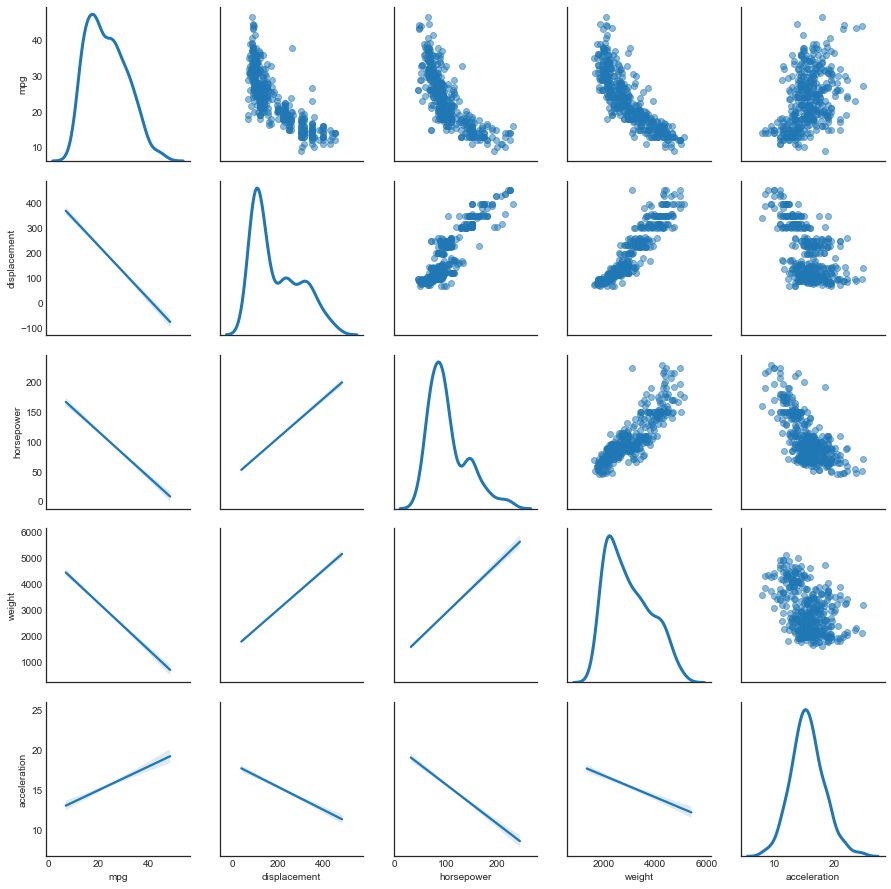

In [12]:
dfcont = df.drop(['carname','cylinders','modelyear','origin'], axis=1)
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(dfcont, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

                   mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.805127   -0.778427 -0.832244      0.423329
displacement -0.805127      1.000000    0.897257  0.932994     -0.543800
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.832244      0.932994    0.864538  1.000000     -0.416839
acceleration  0.423329     -0.543800   -0.689196 -0.416839      1.000000


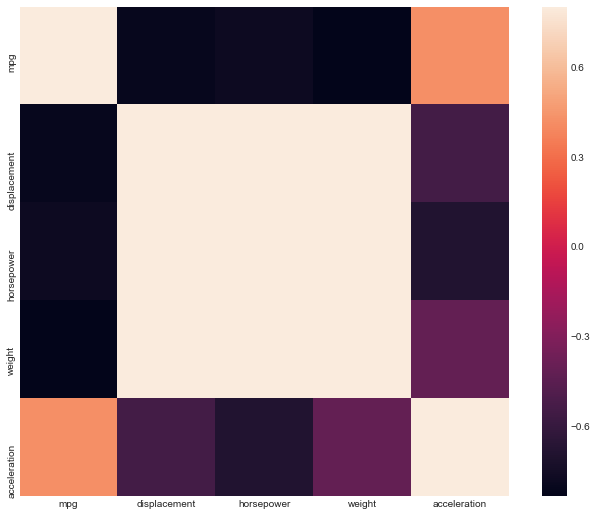

In [13]:
# Make the correlation matrix.
corrmat = dfcont.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

From the correlation matrix it seems that displacement, horsepower and weight are strongly correlated. Acceleration is less correlated with the rest thus providing more information.

In [14]:
df1 = df.drop(['carname'], axis=1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1


d:\users\borja.gonzalez\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


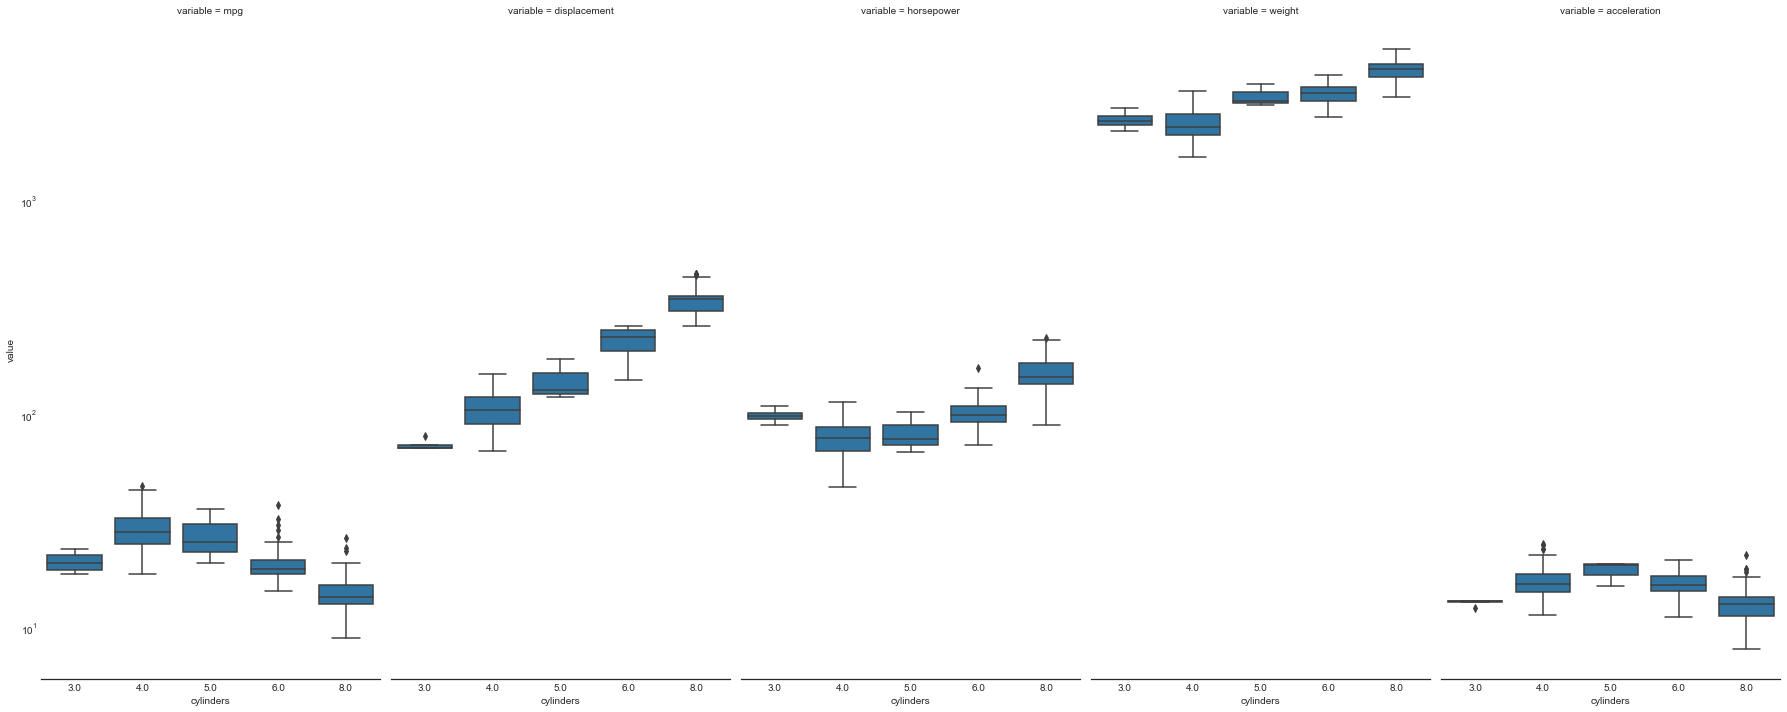

In [15]:
# Plot all the variables with boxplots
dfb = df1.drop(['origin','modelyear'], axis=1)
df_long = dfb
df_long = pd.melt(df_long, id_vars=['cylinders'])


g = sns.FacetGrid(df_long, col="variable",size=10, aspect=.5)
g = g.map(sns.boxplot, "cylinders", "value")
g.fig.get_axes()[0].set_yscale('log')
sns.despine(left=True)
plt.show()

For cylinders = 6 & 8: mpg, displacement & horsepower present outliers
For cylinders = 4, acceleration present outliers

In [16]:
# Descriptive statistics by group.
df1.groupby('cylinders').describe().transpose()

cylinders                   3.0          4.0          5.0          6.0  \
acceleration count     4.000000   199.000000     3.000000    83.000000   
             mean     13.250000    16.581910    18.633333    16.254217   
             std       0.500000     2.383185     2.369247     2.031778   
             min      12.500000    11.600000    15.900000    11.300000   
             25%      13.250000    14.800000    17.900000    15.050000   
             50%      13.500000    16.200000    19.900000    16.000000   
             75%      13.500000    18.000000    20.000000    17.600000   
             max      13.500000    24.800000    20.100000    21.000000   
displacement count     4.000000   199.000000     3.000000    83.000000   
             mean     72.500000   109.670854   145.000000   218.361446   
             std       5.000000    21.376813    33.286634    32.427246   
             min      70.000000    68.000000   121.000000   145.000000   
             25%      70.000000    91.000000   126.000000   199.500000   
             50%      70.000000   105.000000   131.000000   231.000000   
             75%      72.500000   121.000000   157.000000   250.000000   
             max      80.000000   156.000000   183.000000   262.000000   
horsepower   count     4.000000   199.000000     3.000000    83.000000   
             mean     99.250000    78.281407    82.333333   101.506024   
             std       8.301606    14.523099    18.583146    14.310472   
             min      90.000000    46.000000    67.000000    72.000000   
             25%      95.250000    68.000000    72.000000    92.500000   
             50%      98.500000    78.000000    77.000000   100.000000   
             75%     102.500000    88.000000    90.000000   110.000000   
             max     110.000000   115.000000   103.000000   165.000000   
modelyear    count     4.000000   199.000000     3.000000    83.000000   
             mean     75.500000    77.030151    79.000000    75.951807   
             std       3.696846     3.737484     1.000000     3.264381   
             min      72.000000    70.000000    78.000000    70.000000   
             25%      72.750000    74.000000    78.500000    74.000000   
             50%      75.000000    77.000000    79.000000    76.000000   
             75%      77.750000    80.000000    79.500000    78.000000   
             max      80.000000    82.000000    80.000000    82.000000   
mpg          count     4.000000   199.000000     3.000000    83.000000   
             mean     20.550000    29.283920    27.366667    19.973494   
             std       2.564501     5.670546     8.228204     3.828809   
             min      18.000000    18.000000    20.300000    15.000000   
             25%      18.750000    25.000000    22.850000    18.000000   
             50%      20.250000    28.400000    25.400000    19.000000   
             75%      22.050000    32.950000    30.900000    21.000000   
             max      23.700000    46.600000    36.400000    38.000000   
origin       count     4.000000   199.000000     3.000000    83.000000   
             mean      3.000000     2.000000     2.000000     1.192771   
             std       0.000000     0.834847     0.000000     0.551225   
             min       3.000000     1.000000     2.000000     1.000000   
             25%       3.000000     1.000000     2.000000     1.000000   
             50%       3.000000     2.000000     2.000000     1.000000   
             75%       3.000000     3.000000     2.000000     1.000000   
             max       3.000000     3.000000     2.000000     3.000000   
weight       count     4.000000   199.000000     3.000000    83.000000   
             mean   2398.500000  2305.110553  3103.333333  3202.120482   
             std     247.566153   342.872223   374.343870   332.383425   
             min    2124.000000  1613.000000  2830.000000  2472.000000   
             25%    2278.500000  2047.500000  2890.000000  2945.000000   
    

The number of counts for cylinders = 3 and 5 is very small so they are discarded considering only 4, 6 & 8

In [17]:
df1['cylinders'] = df1["cylinders"].astype(float)
df1 = df1.drop( df[(df.cylinders == 3.0)].index )
df1 = df1.drop( df[(df.cylinders == 5.0)].index )

In [18]:
df1['cylinders'] = df1['cylinders'].astype(str)
dffinal1 = df1[['cylinders','modelyear','origin','mpg','displacement','horsepower','weight','acceleration']]
dffinal1.head()

,cylinders,modelyear,origin,mpg,displacement,horsepower,weight,acceleration
0,8.0,70,1,18.0,307.0,130.0,3504.0,12.0
1,8.0,70,1,15.0,350.0,165.0,3693.0,11.5
2,8.0,70,1,18.0,318.0,150.0,3436.0,11.0
3,8.0,70,1,16.0,304.0,150.0,3433.0,12.0
4,8.0,70,1,17.0,302.0,140.0,3449.0,10.5


In [19]:
dffinal1['cylinders'].unique()

array(['8.0', '4.0', '6.0'], dtype=object)

In [20]:
for col in dffinal1.loc[:,'mpg':'acceleration'].columns:
    print(col)
    print(stats.ttest_ind(
        dffinal1[dffinal1['cylinders'] == '4.0'][col],
        dffinal1[dffinal1['cylinders'] == '6.0'][col]
    ))

mpg
Ttest_indResult(statistic=13.704896898546142, pvalue=4.6176516348996581e-33)
displacement
Ttest_indResult(statistic=-33.112179392494404, pvalue=8.0188842366671865e-99)
horsepower
Ttest_indResult(statistic=-12.290984157717734, pvalue=4.6614791369195407e-28)
weight
Ttest_indResult(statistic=-20.200932585820645, pvalue=1.3281556565135272e-56)
acceleration
Ttest_indResult(statistic=1.0971236695009552, pvalue=0.27352996514284744)


In [21]:
for col in dffinal1.loc[:,'mpg':'acceleration'].columns:
    print(col)
    print(stats.ttest_ind(
        dffinal1[dffinal1['cylinders'] == '4.0'][col],
        dffinal1[dffinal1['cylinders'] == '8.0'][col]
    ))

mpg
Ttest_indResult(statistic=24.103973896854541, pvalue=3.7528790110858902e-72)
displacement
Ttest_indResult(statistic=-59.960781625803044, pvalue=4.6497557842603817e-169)
horsepower
Ttest_indResult(statistic=-32.380959782114893, pvalue=6.4048618449507412e-100)
weight
Ttest_indResult(statistic=-39.005421190072092, pvalue=1.6157896144922786e-119)
acceleration
Ttest_indResult(statistic=12.819858346505718, pvalue=2.6761671258949308e-30)


In [22]:
for col in dffinal1.loc[:,'mpg':'acceleration'].columns:
    print(col)
    print(stats.ttest_ind(
        dffinal1[dffinal1['cylinders'] == '6.0'][col],
        dffinal1[dffinal1['cylinders'] == '8.0'][col]
    ))

mpg
Ttest_indResult(statistic=10.2452351142847, pvalue=8.9194661494413186e-20)
displacement
Ttest_indResult(statistic=-20.938533947460595, pvalue=1.4173445767138258e-50)
horsepower
Ttest_indResult(statistic=-16.568640256498949, pvalue=2.4950170362742587e-38)
weight
Ttest_indResult(statistic=-15.42376292075258, pvalue=5.4480493223937389e-35)
acceleration
Ttest_indResult(statistic=10.446470409357158, pvalue=2.3632766141946463e-20)


The difference for all variables for each cylinders value is significant (except for acceleration when comparing 4 & 6)

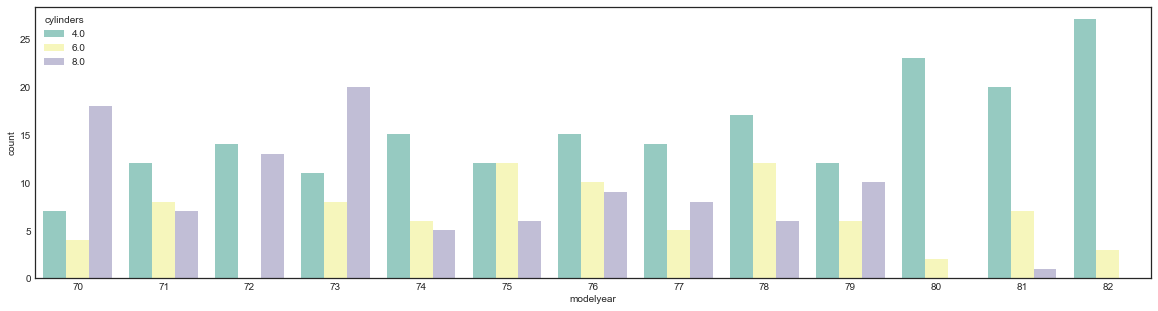

cylinders  4.0  6.0  8.0
modelyear               
70           7    4   18
71          12    8    7
72          14    0   13
73          11    8   20
74          15    6    5
75          12   12    6
76          15   10    9
77          14    5    8
78          17   12    6
79          12    6   10
80          23    2    0
81          20    7    1
82          27    3    0


In [23]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="modelyear", hue='cylinders', data=dffinal1, palette="Set3")
plt.show()

# Table of counts
counttable = pd.crosstab(dffinal1['modelyear'], dffinal1['cylinders'])
print(counttable)

In [24]:
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=158.67012987012987, pvalue=1.0939969858940465e-16)


Modelyear on average is equivalent regarding the population per year. There are differences regarding the cylinders values.
The group size differences are large enough to reflect differences on the population.

####  Create 10 new features

In [25]:
#Feature 1: Standard number of cylinders vs high end number of cylinders

features = pd.get_dummies(dffinal1['cylinders'])
features['High_end'] = np.where((dffinal1['cylinders'].isin(['6.0', '8.0'])), 1, 0)
#print(pd.crosstab(features['High_end'], dffinal1['cylinders']))

In [26]:
#Feature 2: # Cars from the 70s and cars from the 80s.

features = pd.get_dummies(dffinal1['modelyear'])
features['decade'] = np.where((dffinal1['modelyear'].isin(range(70,80))), 1, 0)
#print(pd.crosstab(features['decade'], dffinal1['modelyear']))

In [27]:
# Feature 3: National cars vs imported cars

features = pd.get_dummies(dffinal1['origin'])
features['national'] = np.where((dffinal1['origin'].isin(['1'])), 1, 0)
#print(pd.crosstab(features['national'], dffinal1['origin']))

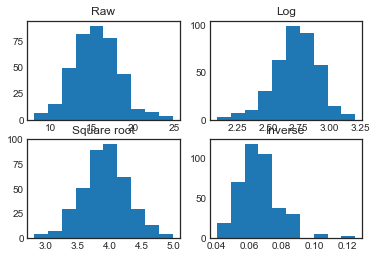

In [28]:
# Feature 4: Nacceleration: Normalized acceleration
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(dffinal1['acceleration'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(dffinal1['acceleration'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(dffinal1['acceleration'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['acceleration'].dropna())
plt.title('Inverse')
plt.show()


features['nacceleration'] = np.sqrt(dffinal1['acceleration'])

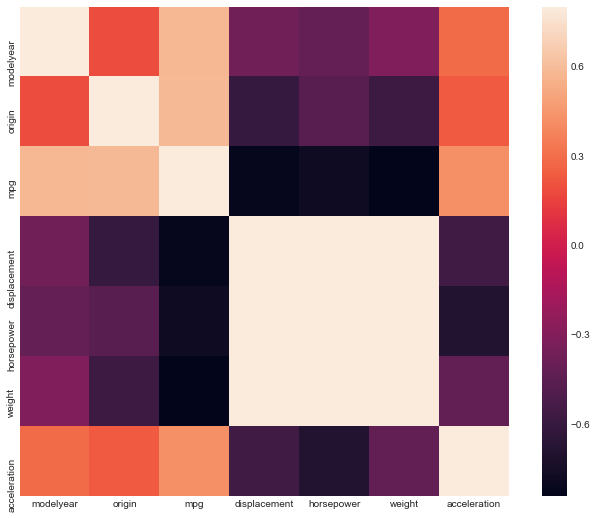

              displacement  horsepower    weight       dhw
displacement      1.000000    0.902830  0.935296  0.978428
horsepower        0.902830    1.000000  0.868906  0.955540
weight            0.935296    0.868906  1.000000  0.966732
dhw               0.978428    0.955540  0.966732  1.000000


In [29]:
# Feature 5: CAR DHW. Composite of highly correlated variables

corrmat = dffinal1.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


means = dffinal1[['displacement','horsepower','weight']].mean(axis=0)
stds = dffinal1[['displacement','horsepower','weight']].std(axis=0)
features['car_dhw'] = ((dffinal1[['displacement','horsepower','weight']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdffinal1= dffinal1.loc[:, ['displacement','horsepower','weight']]
plotdffinal1['dhw'] = features['car_dhw'] 
corrmat2 = plotdffinal1.corr()

print(corrmat2)

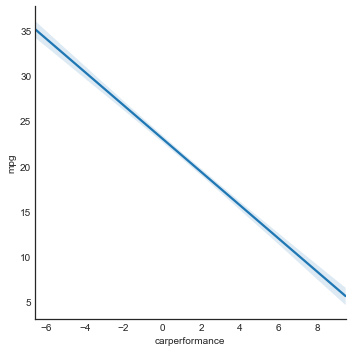

In [30]:
# Feature 6: Carperformance. Relationship between car_dhw & nacceleration
features['carperformance'] = features['car_dhw'] * features['nacceleration']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['mpg'] = dffinal1['mpg']
sns.lmplot(
    x='carperformance',
    y='mpg',

    data=features,
    scatter=False
)
plt.show()

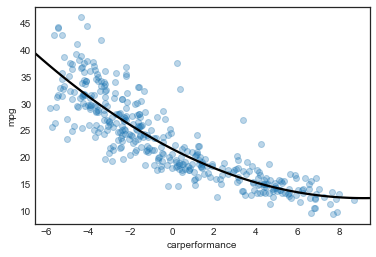

In [31]:
# Feature 7: Carperformance (squared).
sns.regplot(
    features['carperformance'],
    y=dffinal1['mpg'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['carperformance_sq'] = features['carperformance'] * features['carperformance']

In [32]:
# Feature 7: standardised carperformance (squared).
means = features[['carperformance_sq']].mean(axis=0)
stds = features[['carperformance_sq']].std(axis=0)
features['standcarperformance_sq'] = ((features[['carperformance_sq']] - means) / stds).mean(axis=1)

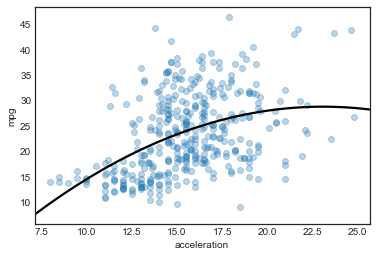

In [33]:
# Feature 8: Acceleration (squared).
sns.regplot(
    dffinal1['acceleration'],
    y=dffinal1['mpg'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['acceleration_sq'] = dffinal1['acceleration'] * dffinal1['acceleration']

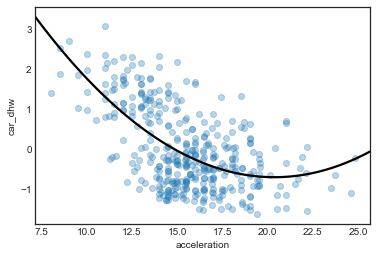

In [34]:
# Feature 9: Dhw composite value abs.
sns.regplot(
    dffinal1['acceleration'],
    y=features['car_dhw'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['dhw_abs'] = features['car_dhw'].abs()

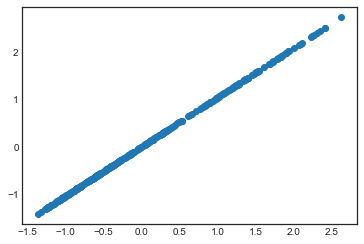

                  1             2           3      national  nacceleration  \
count  3.850000e+02  3.850000e+02  385.000000  3.850000e+02   3.850000e+02   
mean   5.536697e-17  3.691131e-17    0.000000  5.536697e-17   8.858715e-16   
std    1.001301e+00  1.001301e+00    1.001301  1.001301e+00   1.001301e+00   
min   -1.322876e+00 -4.506939e-01   -0.491869 -1.322876e+00  -3.137143e+00   
25%   -1.322876e+00 -4.506939e-01   -0.491869 -1.322876e+00  -5.666576e-01   
50%    7.559289e-01 -4.506939e-01   -0.491869  7.559289e-01   2.960915e-02   
75%    7.559289e-01 -4.506939e-01   -0.491869  7.559289e-01   5.612259e-01   
max    7.559289e-01  2.218801e+00    2.033060  7.559289e-01   3.008909e+00   

          car_dhw  carperformance           mpg  carperformance_sq  \
count  385.000000    3.850000e+02  3.850000e+02       3.850000e+02   
mean     0.000000    1.845566e-17  7.382262e-17       2.214679e-16   
std      1.001301    1.001301e+00  1.001301e+00       1.001301e+00   
min     -1.403983

In [35]:
# Select only numeric variables to scale.
df_num = features.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['car_dhw'], df_scaled['car_dhw'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

In [38]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(df_scaled)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.46302579  0.23714813  0.12130245  0.10446377  0.05761997]
